In [1]:
using JLD,PyPlot, HDF5

In [21]:
using Interpolations # para hacer un bonito diagrama de las capas pyr. y gran.

┌ Info: Precompiling Interpolations [a98d9a8b-a2ab-59e6-89dd-64a1c18fca59]
└ @ Base loading.jl:1260


In [2]:
push!(LOAD_PATH, "../CenterOfMass/")
using TrayectoriasAux
include("grafTrayAuxFun.jl")

semueve (generic function with 2 methods)

In [3]:
nomefondo="../JLDFiles/Deshinibida/180116s1/180116s1cut_evento_1_bandascsd.h5"
nometray="../JLDFiles/Deshinibida/180116s1/180116s1cut_evento_1_bandascs-Trays.jld"
arxf=h5open(nomefondo)
arxt=jldopen(nometray)
nomine=names(arxt)

5-element Array{String,1}:
 "alpha"
 "beta"
 "gamma"
 "spr"
 "uspr"

In [12]:
dfond=Dict{String, Array}()
dcpos=Dict{String, Set}()
dcneg=Dict{String, Set}()

for n in nomine
    dfond[n]=read(arxf[n])
    dcpos[n], dcneg[n]=read(arxt[n])
end

In [10]:
cpos, cneg=dtrays["alpha"];;
csd=dfond["alpha"];
retraso = 0
freq =7022

7022

In [11]:
typeof(cpos)

Set{Array{Any,N} where N}

In [14]:
#cmpred = TrayectoriasAux.reducecatenario(cmp,2,3,400, 0);
#cmnred = TrayectoriasAux.reducecatenario(cmn,2,3,400,0.0);
minlong=7
minmov=2
cmpred=depuratraysets(cpos,  x-> eslarga(x, minlong) & semueve(x, minmov))
cmnred=depuratraysets(cneg, x-> eslarga(x, minlong) & semueve(x, minmov));

In [15]:
(length(cmpred), length(cmnred))

(21, 23)

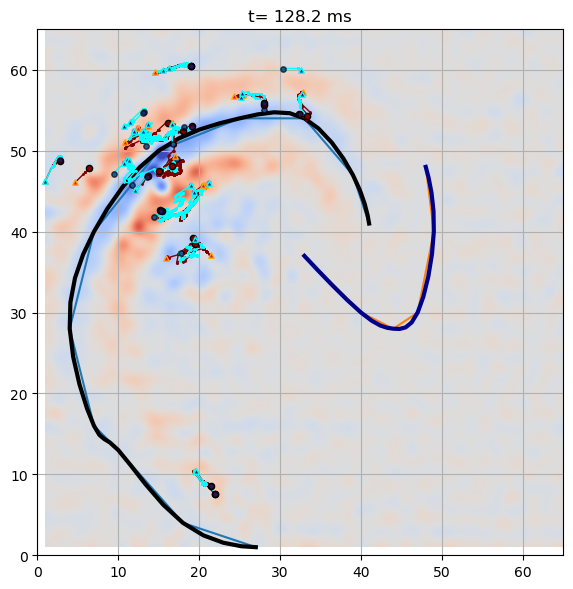

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f43fd63e6d0>

In [35]:
 escribevelo=false 

        cuadro=900
        retrazo=0
        ImagenCSD=csd[:,:,cuadro];
        figure(figsize=(6,6))  
        milisec=round((cuadro-retrazo)/freq*1000,digits=1)
        title("t= $milisec ms")
        tick_params(labelbottom="on", labelleft="on", direction="out")
        xticks(fontsize=10)
        yticks(fontsize=10)
        xlim(0,65)
        ylim(0,65)
        
        limcsd=15
        bolitasrojas=0
        bolitasazules=0
        tight_layout()
    
        guacafondo=imshow(ImagenCSD, cmap="coolwarm", interpolation="lanczos", 
        vmin=-limcsd, vmax=limcsd, extent=[1,65,1,65], origin="lower")
 

    
            for p in cmpred
                paux=p
   
                cucho,fleto=size(paux)
                 longus,falsus=size(p)

                if cucho>0
        #Si son chiquitos no nos interesan.
                    xxpos=paux[:,1]
                    yypos=paux[:,2]
                    gordis=abs.(map(Float32, paux[:,3]))
                    tiempos=round.(paux[:,4]/7.022,digits=1)   
                    
                    plot(xxpos, yypos, marker="o", markersize=1, color="maroon", lw=1,zorder=1900)
                    scatter(xxpos[end],yypos[end],marker="o",s=0.06*gordis, color="red",alpha=0.3)
            
           
                    inicios=scatter(xxpos[1],yypos[1], s=20, edgecolors="black", 
                                linewidth=1,
                                facecolor="maroon", marker="o",zorder=1999 )
        
                
                        finales=scatter(xxpos[end],yypos[end], s=15, edgecolors="orange", 
                        linewidth=1,facecolor="crimson", marker="^", label="Final",zorder=2000 )
                
                    #     annotate(round(tiempos[1],1),  (xxpos[1], yypos[1]), fontsize=7, color="black")
    
                    if escribevelo && (length(tiempos)>1)
                            dist=norm([xxpos[end]-xxpos[end-1],yypos[end]-yypos[end-1]],2)
                            vel=round(dist*freq,1)
                            annotate(vel, (xxpos[end], yypos[end]), fontsize=10, color="maroon", zorder=1950)
                    end
    
      #      scatter(xxpos[end],yypos[end], s=gordis[end]*0.5, alpha=0.5, 
       #     c="darkorange", edgecolors="none")
                    end #(cierra sobre cucho)

                end #cierra sobre cmpred


        for p in cmnred
            paux=p
            paux=p
            cucho,fleto=size(paux)
            longus,falsus=size(p)
            if  cucho>0
                #Si son chiquitos no nos interesan.
                xxpos=paux[:,1]
                yypos=paux[:,2]    
                gordis=abs.(map(Float32, paux[:,3]))
                tiempos= round.((paux[:,4].-retraso)/7.022,digits=1)   
                plot(xxpos, yypos, marker="o", markersize=1, color="cyan", lw=1,zorder=1998)   
                    scatter(xxpos[end],yypos[end],marker="o", s=0.06*gordis, color="blue",alpha=0.3)
                inicios=scatter(xxpos[1],yypos[1], s=15, edgecolors="black", 
                linewidth=1,
                facecolor="midnightblue", alpha=0.7, marker="o", label="Final",zorder=1999 )        
            
                        finales=scatter(xxpos[end],yypos[end], s=15, edgecolors="cyan", 
                    linewidth=1,
                    facecolor="midnightblue", marker="^", label="Final",zorder=2000 )
    
            
            if(escribevelo) && (length(tiempos)>1)
                dist=norm([xxpos[end]-xxpos[end-1],yypos[end]-yypos[end-1]],2)
                vel=round(dist*freq,1)
                annotate(vel, (xxpos[end], yypos[end]), fontsize=10, color="cyan", zorder=1950)
             end
                end #sobre cucho
            end #sobre cmnegred
        
  grid()
   #=
 savefig("CSDyTray-estriado-todas.svg",dpi=90)    
      
   =#1

plot(CApunts[:,1], CApunts[:,2])
plot(GDpunts[:,1], GDpunts[:,2])

plot(gdx, gdy, lw=3, color="darkblue")
plot(cax, cay, lw=3, color="black")

In [36]:
## Un super spline para 
## los diagramas de CA y GD. 
## algo de rollo, pero necesario.

CApunts=[[27 1];  [18 4];  [10 13];  [7 16]; [4 28];  [7 40]; [15 50];  [25 54]; [33 54]; [39 47]; [41 41]]

GDpunts=[[33 37]; [40 30]; [44  28]; [47 30]; [49 40]; [48 48]]

gdxin = interpolate( vec( GDpunts[ :,1 ] ), 
    BSpline( Cubic( Flat( OnCell( )
                )
            )
        )
    );
gdyin=interpolate(vec(GDpunts[:,2]), BSpline(Cubic(Flat(OnCell()))))
gdx=gdxin(range(1,6, step=0.25))
gdy=gdyin(range(1,6, step=0.25))

caxin=interpolate(vec(CApunts[:,1]), BSpline(Cubic(Flat(OnCell()))))
cayin=interpolate(vec(CApunts[:,2]), BSpline(Cubic(Flat(OnCell()))))
cax=caxin(range(1,11, step=0.25))
cay=cayin(range(1,11, step=0.25));


In [37]:

function ploteaanimacioncompleta(csd, cmp,cmn; 
        inicio=1, fin=1500, traypos=true, trayneg=true, escribevelo=false)

    retrazo=inicio
    tiemposinteresantes=inicio:fin
    
    println("este es el fin= $fin !!!")
    
    epsi=2
    vepsi=(-epsi,epsi)
    cepsi=("teal","tomato")
    limcsd=7
    distie=42 #Distancia inter electrodo
    extent=[-0.5,64.5,-0.5,64.5]
    
    for cuadro in tiemposinteresantes
       
        ImagenCSD=csd[:,:,cuadro];
        
        figure(figsize=(3,3))
        axis("equal")
        milisec=round((cuadro-retrazo)/freq*1000,digits=1)
        title("t= $milisec ms")
        
        tick_params(labelbottom="on", labelleft="on", direction="out")
        xticks(fontsize=8)
        yticks(fontsize=8)
        xlim(-0.5,64.5)
        ylim(-0.5,64.5)
  
        bolitasrojas=0
        bolitasazules=0
       
    
        guacafondo=imshow(ImagenCSD, origin="lower", cmap="coolwarm", interpolation="lanczos", 
        vmin=-limcsd, vmax=limcsd, extent=extent, zorder=1)
        
        contour(ImagenCSD, vepsi, colors=cepsi, 
            linewidths=0.4, extent=extent, zorder=2)
        
        if traypos
            
            for p in cmpred
                paux=AntesQue(p,cuadro+1)
               # paux=AntesQue(p, 20000)
                paux=DespuesQue(paux,retrazo)
                cucho,fleto=size(paux)
                 longus,falsus=size(p)   
                
                if cucho>0  && (p[end,4] >= cuadro-7) ## que se dibujen hasta final pero que persistan un poco
        #Si son chiquitos no nos interesan.
                  #  println("si dibujo un paux ")
                    xxpos=paux[:,1]
                    yypos=paux[:,2]
                    gordis=abs.(paux[:,3])
                    tiempos=round.(paux[:,4]/7.022,digits=1)   
                    
                    plot(xxpos, yypos, marker="o", markersize=1, color="maroon", lw=0.75,zorder=3)
                    
                    #=
                    scatter(xxpos[end],yypos[end],marker="o",s=0.06*gordis, color="red",alpha=0.3)
                    inicios=scatter(xxpos[1],yypos[1], s=10, edgecolors="black", 
                                linewidth=1,
                                facecolor="maroon", marker="o",zorder=1999 )
                    =#
                finales=scatter(xxpos[end],yypos[end], s=15, edgecolors="black", 
                linewidth=1.5,
                facecolor="red", marker="o", label="Final" ,zorder=4)
                    #     annotate(round(tiempos[1],1),  (xxpos[1], yypos[1]), fontsize=7, color="black")
    
                    if escribevelo && (length(tiempos)>1)
                            dist=norm([xxpos[end]-xxpos[end-1],yypos[end]-yypos[end-1]],2)
                            vel=round(dist*freq*distie,1)
                            annotate(vel, (xxpos[end], yypos[end]), fontsize=10, color="maroon", zorder=19)
                    end
    
      #      scatter(xxpos[end],yypos[end], s=gordis[end]*0.5, alpha=0.5, 
       #     c="darkorange", edgecolors="none")
                    end #(cierra sobre cucho)

                end #cierra sobre cmpred
            end #cierra sobre if pos

      if trayneg
        for p in cmnred
            paux=AntesQue(p,cuadro+1)
            paux=DespuesQue(paux,retrazo)
            cucho,fleto=size(paux)
            longus,falsus=size(p)
                if  cucho>0  && (p[end,4] >= cuadro-7) #persistencia por un ratito
                #Si son chiquitos no nos interesan.
                xxpos=paux[:,1]
                yypos=paux[:,2]    
                gordis=abs.(map(Float32, paux[:,3]))
                tiempos= round.((paux[:,4].-retraso)/7.022,digits=1)   
              
                    plot(xxpos, yypos, marker="o", markersize=1, color="darkblue", lw=0.75,zorder=3)   
               
                #=    
                scatter(xxpos[end],yypos[end],marker="o", s=0.06*gordis, color="blue",alpha=0.3)
                    inicios=scatter(xxpos[1],yypos[1], s=10, edgecolors="black", 
                linewidth=1,
                facecolor="midnightblue", alpha=0.7, marker="o", label="Final",zorder=1999 )        
                =#   
                    
                finales=scatter(xxpos[end],yypos[end], s=15, edgecolors="black", 
                linewidth=1.5,
                facecolor="darkblue", marker="o", label="Final" ,zorder=4)
                    
                    
            if(escribevelo) && (length(tiempos)>1)
                dist=norm([xxpos[end]-xxpos[end-1],yypos[end]-yypos[end-1]],2)
                vel=round(dist*freq*distie,1)
                        annotate(vel, (xxpos[end], yypos[end]), fontsize=10, color="darkblue", zorder=19)
             end
                end #sobre cucho
            end #sobre cmnegred
        end #sobre trayneg
        
        tight_layout()
        nstring=lpad(cuadro, 5, "0")
        savefig("tray_deshinibida-18-gamma-$nstring.png",dpi=92)    
     #   savefig("CSDyTray-$cuadro.svg",dpi=90)    
        PyPlot.close_figs() 
        
        print(" $nstring , ")
        
    end #sobre tiempos interesantes
    println("listo") 
end  #sobre function

function ploteaanimacioncompleta(csd, cmp, cmn)
        final=size(csd,3)
    ploteaanimacioncompleta(csd, cmp, cmn, 
        inicio=1, fin=final, traypos=true, trayneg=true, 
        escribevelo=false)

end


ploteaanimacioncompleta (generic function with 1 method)

In [39]:
#ploteaanimacioncompleta(csd,cmp, cmn, inicio=950, fin=1010, traypos=true, trayneg=true, 
 #   escribevelo=false)

In [40]:
#ploteaanimacioncompleta(csd,cmp, cmn)

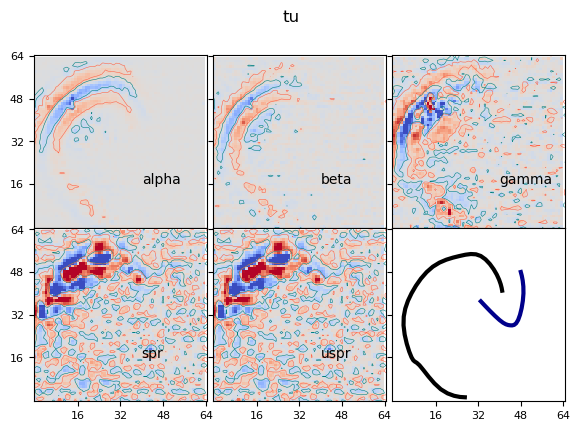

PyObject Text(0.5, 0.98, 'tu')

In [122]:
fafa, lista=subplots(2,3, sharex=true, sharey=true, figsize=(4.6,3).*1.5)

xlim(-0.5, 64.5)
ylim(-0.5, 64.5)


   epsi=2
    vepsi=(-epsi,epsi)
    cepsi=("teal","tomato")
    limcsd=21
    distie=42 #Distancia inter electrodo
    extent=[-0.5,64.5,-0.5,64.5]


for a in lista
     a.set_xticks(collect(16:16:65))
     a.set_yticks(collect(16:16:65))
  # a.set_xticklabels(fontsize=2)
 #a.yticks(fontsize=20)
    a.set_aspect("equal")
    a.tick_params(labelsize=8) 
 
end

n=1010

for j=0:4
    reng,col=divrem(j,3).+1
    nom=nomine[j+1]
    csd=dfond[nom][:,:,n]
    lista[reng,col].imshow(csd, vmin=-limcsd, vmax=limcsd, cmap="coolwarm")
    lista[reng,col].contour(csd, vepsi, colors=cepsi, 
            linewidths=0.4, extent=extent, zorder=2)
    lista[reng,col].annotate(nom, (40, 16))
    
end

    lista[2,3].plot(gdx, gdy, lw=3, color="darkblue")
    lista[2,3].plot(cax, cay, lw=3, color="black")

#for x in lista
fafa.subplots_adjust(hspace=0.00)
fafa.subplots_adjust(wspace=0.01)   
fafa.suptitle("tu")

In [125]:

function mosaicobandacsd(dictcsd::Dict{String, Array}, nombres::Array, cuadro::Int)

fafa, lista=subplots(2,3, sharex=true, sharey=true, figsize=(4.6,2.8).*1.5)

xlim(-0.5, 64.5)
ylim(-0.5, 64.5)
    

   epsi=2
    vepsi=(-epsi,epsi)
    cepsi=("teal","tomato")
    limcsd=21
    distie=42 #Distancia inter electrodo
    extent=[-0.5,64.5,-0.5,64.5]

    tms=round(cuadro/freq*1000, digits=1)
    

for a in lista
     a.set_xticks(collect(16:16:65))
     a.set_yticks(collect(16:16:65))
  # a.set_xticklabels(fontsize=2)
 #a.yticks(fontsize=20)
    a.set_aspect("equal")
    a.tick_params(labelsize=8) 
 
end



for j=0:4
    reng,col=divrem(j,3).+1
    nom=nombres[j+1]
    csd=dictcsd[nom][:,:,cuadro]
    lista[reng,col].imshow(csd, vmin=-limcsd, vmax=limcsd, cmap="coolwarm")
    lista[reng,col].contour(csd, vepsi, colors=cepsi, 
            linewidths=0.4, extent=extent, zorder=2)
    lista[reng,col].annotate(nom, (40, 16))
    
end

    lista[2,3].plot(gdx, gdy, lw=3, color="darkblue")
    lista[2,3].plot(cax, cay, lw=3, color="black")

#for x in lista
fafa.subplots_adjust(hspace=0.00)
 fafa.subplots_adjust(hspace=0.0)

    nstring=lpad(cuadro, 5, "0")
        fafa.suptitle("t = $tms ms")

    
    outname="test_"*nstring*".png"
    savefig(outname)
    close()
    
    return tms
    
end

mosaicobandacsd (generic function with 1 method)

In [126]:
mosaicobandacsd(dfond, nomine, 1000)

142.4

In [127]:
for j=1:2001
    mosaicobandacsd(dfond, nomine, j)
end

sys:1: UserWarning: No contour levels were found within the data range.
sys:1: UserWarning: No contour levels were found within the data range.
sys:1: UserWarning: No contour levels were found within the data range.
sys:1: UserWarning: No contour levels were found within the data range.
sys:1: UserWarning: No contour levels were found within the data range.
sys:1: UserWarning: No contour levels were found within the data range.
sys:1: UserWarning: No contour levels were found within the data range.
sys:1: UserWarning: No contour levels were found within the data range.
sys:1: UserWarning: No contour levels were found within the data range.
sys:1: UserWarning: No contour levels were found within the data range.
sys:1: UserWarning: No contour levels were found within the data range.
sys:1: UserWarning: No contour levels were found within the data range.
sys:1: UserWarning: No contour levels were found within the data range.
sys:1: UserWarning: No contour levels were found within the data

 Vamos a hacer una latíz de graficas siguiendo las directivas del RGut.

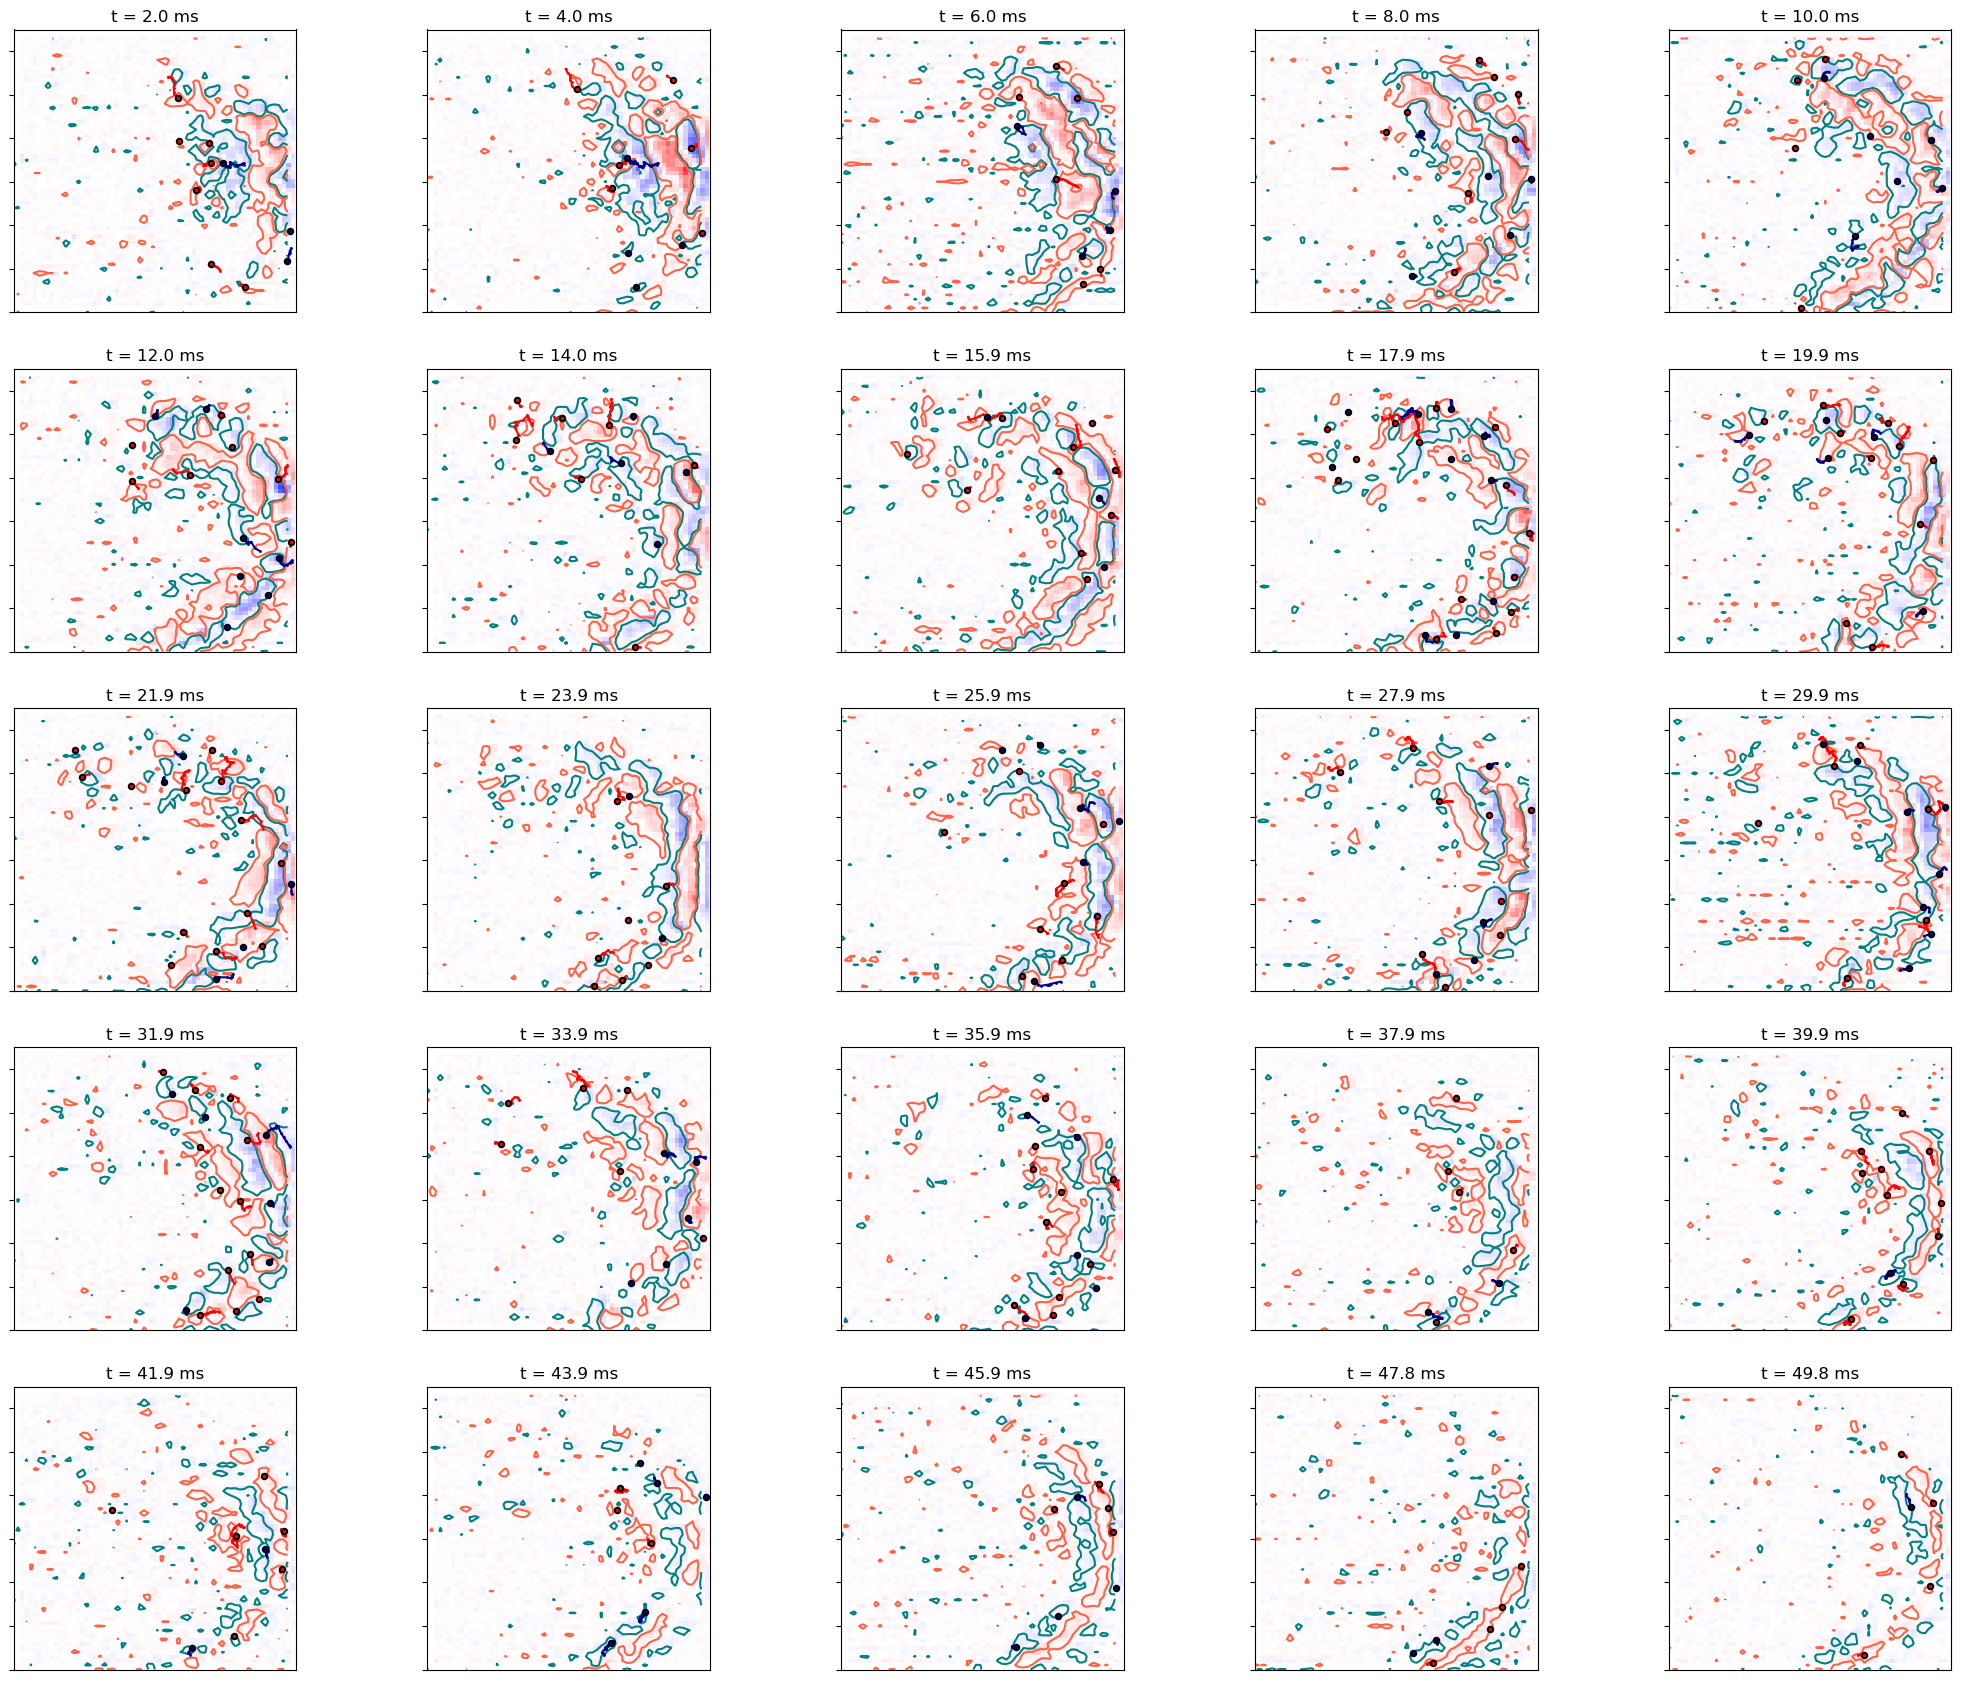

1484.588972 seconds (2.97 M allocations: 139.284 MiB, 0.00% gc time)


In [25]:
ion()
farofa, lista=subplots(5,5, figsize=(25,20))
limcsd=400
inicio=1084
fin=1500
retrazo=inicio

paso=14

epsi=9
vepsi=(-epsi,epsi)
cepsi=("teal","tomato")

@time for j=1:25
    pu=ceil(Int,j/5)
    pa=mod(j,5)
    #reallambda=(1+intervalo*j/rangolambda)
    if pa==0; pa=5;end
    cuadro=inicio+j*paso
    milisec=round((cuadro-retrazo)/freq,1)
    
    subplots_adjust(bottom=0.06,left=0.1)
    
    lista[pu,pa][:imshow](csd[:,:,cuadro],cmap="seismic",vmin=-limcsd,vmax=limcsd,
        interpolation="nearest",extent=[1.5,64.5,63.5,1.5])
    lista[pu,pa][:contour](csd[:,:,cuadro], vepsi, colors=cepsi, lw=0.75)
    
    lista[pu,pa][:set_title]("t = $milisec ms")
    lista[pu,pa][:tick_params](bottom="off", axis="both",which="both", labelbottom="off", labelleft="off")

    for (k,p) in cmpred

        paux=AntesQue(p,cuadro+paso)
        paux=DespuesQue(paux,retrazo-paso)
        cucho,fleto=size(paux)
         longus,falsus=size(p)

        
        if  (p[end,4] >= cuadro+paso) && cucho>0
            xxpos=paux[:,1]
            yypos=paux[:,2]    
            gordis=abs.(map(Float32, paux[:,3]))
            
            
        
            lista[pu,pa][:set_xlim]([0,65])
            lista[pu,pa][:set_ylim]([0,65])
            
            #Linea con puntos
            lista[pu,pa][:plot](xxpos, yypos, marker="o", markersize=1, color="red", lw=1.5,zorder=1998)
              #Circulos proporcionales a la intensidad
            #lista[pu,pa][:scatter](xxpos[end],yypos[end],marker="o", s=0.0615*gordis, color="orange",alpha=0.3)
            
            #Inicio
            #inicios=lista[pu,pa][:scatter](xxpos[1],yypos[1], s=15, edgecolors="black", 
            #linewidth=1,facecolor="crimson", alpha=0.7, marker="o", label="Final",zorder=1999 )
            
           
            #if paux[end,1]==p[end,1]
            #    finales=lista[pu,pa][:scatter](xxpos[end],yypos[end], s=15, edgecolors="black", 
            #    linewidth=1,
            #    facecolor="orange", marker="^", label="Final",zorder=2000 )
            #else
              
              #do nothing
            finales=lista[pu,pa][:scatter](xxpos[end],yypos[end], s=15, edgecolors="black", 
                linewidth=1.5,
                facecolor="red", marker="o", label="Final" ,zorder=2000)
                
            #end
   
        
   #=
            if(length(tiempos)>1)
                dist=norm([xxpos[end]-xxpos[end-1],yypos[end]-yypos[end-1]],2)
                vel=round(dist*freq,1)
                annotate(vel, (xxpos[end], yypos[end]), fontsize=10, color="cyan", zorder=1950)
            end
     =#       
    end
    
end
    
    
    
    for (k,p) in cmnegred

        paux=AntesQue(p,cuadro+paso)
        paux=DespuesQue(paux,retrazo)
        cucho,fleto=size(paux)
         longus,falsus=size(p)

        
        if  p[end,4]>=cuadro+paso && cucho>0
        #Si son chiquitos no nos interesan.
            xxpos=paux[:,1]
            yypos=paux[:,2]    
            gordis=abs.(map(Float32, paux[:,3]))
            
            lista[pu,pa][:set_xlim]([0,65])
            lista[pu,pa][:set_ylim]([0,65])
            
            #Linea con puntos
            lista[pu,pa][:plot](xxpos, yypos, marker="o", markersize=1, color="darkblue", lw=1.5,zorder=1998)
              #Circulos proporcionales a la intensidad
            #lista[pu,pa][:scatter](xxpos[end],yypos[end],marker="o", s=0.0615*gordis, color="orange",alpha=0.3)
            
            #Inicio
            #inicios=lista[pu,pa][:scatter](xxpos[1],yypos[1], s=15, edgecolors="black", 
            #linewidth=1,facecolor="midnightblue", alpha=0.7, marker="o", label="Final",zorder=1999 )
            
           
          #  if paux[end,1]==p[end,1]
          #      finales=lista[pu,pa][:scatter](xxpos[end],yypos[end], s=15, edgecolors="black", 
          #      linewidth=1,
          #      facecolor="blue", marker="^", label="Final",zorder=2000 )
           # else
              
               # do nothing
            finales=lista[pu,pa][:scatter](xxpos[end],yypos[end], s=15, edgecolors="black", 
                linewidth=1.5,
                facecolor="darkblue", marker="o", label="Final" ,zorder=2000)
                
            # end
   
        
   #=
            if(length(tiempos)>1)
                dist=norm([xxpos[end]-xxpos[end-1],yypos[end]-yypos[end-1]],2)
                vel=round(dist*freq,1)
                annotate(vel, (xxpos[end], yypos[end]), fontsize=10, color="cyan", zorder=1950)
            end
     =#       
    end
    
end
    
end

#savefig("MosaicoFuentes_140116s2cut2_evento_2.png")
savefig("Mosaico_140116s2cut2_evento_2-05.svg")



In [ ]:
a=rand(3,4)

In [ ]:
a[:,3]

In [ ]:
a[end,3]